### Učitavanje podataka

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
y = data.iloc[:, -1]

In [5]:
X = data.iloc[:, :data.shape[1] - 1]

### Pravljenje atributa i metrika za evaluaciju i izbor najboljeg modela

Parametri za izbor modela:

In [6]:
cnn_par_raw= {
    'window': [3, 11, 15, 19],
    'dropout': [0.1, 0.2, 0.5]
}

In [7]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [8]:
from sklearn import preprocessing

In [9]:
filter_cnn = 64
num_classes = len(np.unique(y))
epochs = 25
K=10

In [10]:
pool = 3
classes = np.unique(y)
num_classes = len(classes)

In [11]:
scoring = {'f1_macro' : 'f1_macro', 'accuracy' : 'accuracy'}
for c in classes:
    def f1_class(y_true, y_pred, classes, c=c):
        return metrics.f1_score(y_true, y_pred, average=None)[c-1]
    scoring_name = 'f1_class_%d' % c
    scoring[scoring_name] = metrics.make_scorer(f1_class, classes = classes)

### Podela podataka na trening i testni skup, standardizacija

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, stratify = y,random_state = 1996)

In [13]:
scaler_train = preprocessing.StandardScaler()
scaler_train.fit(X_train)
X_train = scaler_train.transform(X_train)
X_test = scaler_train.transform(X_test)

In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
input_shape = (X_train.shape[1], 1)

### Pravljenje mreže i izbor najboljeg modela unakrsnom validacijom

In [17]:
def mreza(input_shape, num_classes,window, dropout):
    model = Sequential()
    model.add(Conv1D(filter_cnn, window, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filter_cnn, window, activation='relu'))
    model.add(MaxPooling1D(pool))
    model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
    model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
from keras.wrappers.scikit_learn  import KerasClassifier
def get_estimator(window=3,dropout=0.5):
    return KerasClassifier(build_fn=mreza,input_shape=input_shape, num_classes=num_classes,window=window, dropout=dropout,epochs=epochs)

In [19]:
estimator = get_estimator()

In [20]:
grid_cnn = model_selection.GridSearchCV(estimator, param_grid=cnn_par_raw, scoring=scoring, cv=K, refit='accuracy', return_train_score=True)

In [21]:
grid_cnn.fit(X_train, y_train)

Epoch 1/25
7245/7245 [==============================] - 8s 1ms/step - loss: 1.0455 - accuracy: 0.5259
Epoch 2/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.8227 - accuracy: 0.6235
Epoch 3/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.7963 - accuracy: 0.6333
Epoch 4/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.7364 - accuracy: 0.6563
Epoch 5/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.6877 - accuracy: 0.6762
Epoch 6/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6511 - accuracy: 0.6934: 
Epoch 7/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.6397 - accuracy: 0.6984
Epoch 8/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.6253 - accuracy: 0.6943
Epoch 9/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.6079 - accuracy: 0.7119
Epoch 10/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.6

7245/7245 [==============================] - 7s 921us/step - loss: 0.6845 - accuracy: 0.6752
Epoch 5/25
7245/7245 [==============================] - 7s 924us/step - loss: 0.6561 - accuracy: 0.6832
Epoch 6/25
7245/7245 [==============================] - 7s 921us/step - loss: 0.6327 - accuracy: 0.6959
Epoch 7/25
7245/7245 [==============================] - 7s 923us/step - loss: 0.6284 - accuracy: 0.6995
Epoch 8/25
7245/7245 [==============================] - 7s 937us/step - loss: 0.6135 - accuracy: 0.7074
Epoch 9/25
7245/7245 [==============================] - 7s 926us/step - loss: 0.6139 - accuracy: 0.7101
Epoch 10/25
7245/7245 [==============================] - 7s 931us/step - loss: 0.5977 - accuracy: 0.71440s - loss: 0.6003 - accura - ETA: 0s - loss: 0
Epoch 11/25
7245/7245 [==============================] - 7s 923us/step - loss: 0.5915 - accuracy: 0.7119
Epoch 12/25
7245/7245 [==============================] - 7s 921us/step - loss: 0.5861 - accuracy: 0.7194
Epoch 13/25
7245/7245 [===

7245/7245 [==============================] - 7s 943us/step - loss: 0.6677 - accuracy: 0.6821
Epoch 7/25
7245/7245 [==============================] - 7s 945us/step - loss: 0.6429 - accuracy: 0.6937
Epoch 8/25
7245/7245 [==============================] - 7s 947us/step - loss: 0.6211 - accuracy: 0.7066
Epoch 9/25
7245/7245 [==============================] - 7s 947us/step - loss: 0.6077 - accuracy: 0.7100
Epoch 10/25
7245/7245 [==============================] - 7s 952us/step - loss: 0.6031 - accuracy: 0.7155
Epoch 11/25
7245/7245 [==============================] - 7s 947us/step - loss: 0.6041 - accuracy: 0.7166
Epoch 12/25
7245/7245 [==============================] - 7s 951us/step - loss: 0.5910 - accuracy: 0.7212
Epoch 13/25
7245/7245 [==============================] - 7s 957us/step - loss: 0.5803 - accuracy: 0.7233
Epoch 14/25
7245/7245 [==============================] - 7s 951us/step - loss: 0.5784 - accuracy: 0.7249
Epoch 15/25
7245/7245 [==============================] - 7s 949us/step

7245/7245 [==============================] - 7s 942us/step - loss: 0.6216 - accuracy: 0.6997
Epoch 9/25
7245/7245 [==============================] - 7s 933us/step - loss: 0.6080 - accuracy: 0.7048
Epoch 10/25
7245/7245 [==============================] - 7s 937us/step - loss: 0.6009 - accuracy: 0.7064
Epoch 11/25
7245/7245 [==============================] - 7s 950us/step - loss: 0.5900 - accuracy: 0.7111
Epoch 12/25
7245/7245 [==============================] - 7s 941us/step - loss: 0.5856 - accuracy: 0.7117
Epoch 13/25
7245/7245 [==============================] - 7s 941us/step - loss: 0.5695 - accuracy: 0.7222
Epoch 14/25
7245/7245 [==============================] - 7s 943us/step - loss: 0.5800 - accuracy: 0.7233
Epoch 15/25
7245/7245 [==============================] - 7s 948us/step - loss: 0.5535 - accuracy: 0.7286
Epoch 16/25
7245/7245 [==============================] - 7s 936us/step - loss: 0.5445 - accuracy: 0.7284
Epoch 17/25
7245/7245 [==============================] - 7s 942us/st

7245/7245 [==============================] - 15s 2ms/step - loss: 0.5122 - accuracy: 0.7614
Epoch 12/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5063 - accuracy: 0.7678
Epoch 13/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4709 - accuracy: 0.7863
Epoch 14/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4633 - accuracy: 0.7866
Epoch 15/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4826 - accuracy: 0.7807
Epoch 16/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4349 - accuracy: 0.8048
Epoch 17/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4185 - accuracy: 0.8102
Epoch 18/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4036 - accuracy: 0.8167
Epoch 19/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.3857 - accuracy: 0.8280
Epoch 20/25
7245/7245 [==============================] - 15s 2ms/step - loss

7245/7245 [==============================] - 15s 2ms/step - loss: 0.4853 - accuracy: 0.7738
Epoch 15/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4867 - accuracy: 0.7821
Epoch 16/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4501 - accuracy: 0.8021
Epoch 17/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4356 - accuracy: 0.7994
Epoch 18/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4168 - accuracy: 0.8112
Epoch 19/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4073 - accuracy: 0.8184
Epoch 20/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4216 - accuracy: 0.8199
Epoch 21/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.3721 - accuracy: 0.8306
Epoch 22/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.3686 - accuracy: 0.8356
Epoch 23/25
7245/7245 [==============================] - 15s 2ms/step - loss

7245/7245 [==============================] - 15s 2ms/step - loss: 0.4052 - accuracy: 0.8185
Epoch 19/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4019 - accuracy: 0.8225
Epoch 20/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.3669 - accuracy: 0.8404
Epoch 21/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.3804 - accuracy: 0.8344
Epoch 22/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.3535 - accuracy: 0.8402
Epoch 23/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.3279 - accuracy: 0.8527
Epoch 24/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.3093 - accuracy: 0.8634
Epoch 25/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.3209 - accuracy: 0.8617
Epoch 1/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.9820 - accuracy: 0.5545
Epoch 2/25
7245/7245 [==============================] - 16s 2ms/step - loss: 

7245/7245 [==============================] - 19s 3ms/step - loss: 0.2430 - accuracy: 0.8939
Epoch 22/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.2459 - accuracy: 0.8952
Epoch 23/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.2148 - accuracy: 0.9060
Epoch 24/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.2283 - accuracy: 0.9037
Epoch 25/25
7245/7245 [==============================] - 18s 3ms/step - loss: 0.1652 - accuracy: 0.9304
Epoch 1/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.9231 - accuracy: 0.5707
Epoch 2/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.7124 - accuracy: 0.6523
Epoch 3/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.6610 - accuracy: 0.6778 1s - l
Epoch 4/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.6291 - accuracy: 0.6997
Epoch 5/25
7245/7245 [==============================] - 19s 3ms/step - lo

7245/7245 [==============================] - 19s 3ms/step - loss: 0.2445 - accuracy: 0.8954
Epoch 25/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.2072 - accuracy: 0.9078
Epoch 1/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.9336 - accuracy: 0.5619
Epoch 2/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.6846 - accuracy: 0.6657
Epoch 3/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.6426 - accuracy: 0.6861
Epoch 4/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.6049 - accuracy: 0.7124
Epoch 5/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.5877 - accuracy: 0.7208
Epoch 6/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.5574 - accuracy: 0.7360
Epoch 7/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.5278 - accuracy: 0.7488
Epoch 8/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.5505

7245/7245 [==============================] - 20s 3ms/step - loss: 0.7179 - accuracy: 0.6624 0s - loss: 0.7181 - accuracy: 0.
Epoch 3/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.6614 - accuracy: 0.6896
Epoch 4/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.6192 - accuracy: 0.7030
Epoch 5/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.5912 - accuracy: 0.7220
Epoch 6/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.5673 - accuracy: 0.7292
Epoch 7/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.5575 - accuracy: 0.7339
Epoch 8/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.5297 - accuracy: 0.7539
Epoch 9/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.5286 - accuracy: 0.7576
Epoch 10/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.4866 - accuracy: 0.7742
Epoch 11/25
7245/7245 [===========================

7245/7245 [==============================] - 23s 3ms/step - loss: 0.5720 - accuracy: 0.7256
Epoch 6/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.5508 - accuracy: 0.7397
Epoch 7/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.5281 - accuracy: 0.7507
Epoch 8/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.5131 - accuracy: 0.7615
Epoch 9/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4856 - accuracy: 0.7756
Epoch 10/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4576 - accuracy: 0.7903
Epoch 11/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4330 - accuracy: 0.8028
Epoch 12/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4595 - accuracy: 0.8006
Epoch 13/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.3932 - accuracy: 0.8232
Epoch 14/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.

7245/7245 [==============================] - 23s 3ms/step - loss: 0.5229 - accuracy: 0.7458
Epoch 9/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4926 - accuracy: 0.7580
Epoch 10/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4926 - accuracy: 0.7645
Epoch 11/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.4524 - accuracy: 0.7899
Epoch 12/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4346 - accuracy: 0.7919
Epoch 13/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4269 - accuracy: 0.8040
Epoch 14/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.3896 - accuracy: 0.8206
Epoch 15/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.3732 - accuracy: 0.8239
Epoch 16/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.3642 - accuracy: 0.8327
Epoch 17/25
7245/7245 [==============================] - 23s 3ms/step - loss:

7245/7245 [==============================] - 24s 3ms/step - loss: 0.4365 - accuracy: 0.7975
Epoch 13/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4224 - accuracy: 0.8086
Epoch 14/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4262 - accuracy: 0.8079
Epoch 15/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.3699 - accuracy: 0.8384
Epoch 16/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.3354 - accuracy: 0.8524
Epoch 17/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.3131 - accuracy: 0.8646
Epoch 18/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.3137 - accuracy: 0.8603
Epoch 19/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.2675 - accuracy: 0.8813
Epoch 20/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.2316 - accuracy: 0.8990
Epoch 21/25
7245/7245 [==============================] - 24s 3ms/step - loss

7245/7245 [==============================] - 8s 1ms/step - loss: 0.5794 - accuracy: 0.7193
Epoch 17/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5863 - accuracy: 0.7217
Epoch 18/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5680 - accuracy: 0.7260
Epoch 19/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5622 - accuracy: 0.7311
Epoch 20/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5587 - accuracy: 0.7310
Epoch 21/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5589 - accuracy: 0.7317: 0s - loss: 0.5567 - accuracy
Epoch 22/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.5632 - accuracy: 0.7295
Epoch 23/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.5489 - accuracy: 0.7383
Epoch 24/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.5399 - accuracy: 0.7434
Epoch 25/25
7245/7245 [==============================] 

7245/7245 [==============================] - 8s 1ms/step - loss: 0.5637 - accuracy: 0.7297
Epoch 21/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5518 - accuracy: 0.7311
Epoch 22/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5499 - accuracy: 0.7331
Epoch 23/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5344 - accuracy: 0.7444
Epoch 24/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5305 - accuracy: 0.7387
Epoch 25/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5141 - accuracy: 0.7499
Epoch 1/25
7245/7245 [==============================] - 8s 1ms/step - loss: 1.0366 - accuracy: 0.5194
Epoch 2/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.8213 - accuracy: 0.6224
Epoch 3/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.7704 - accuracy: 0.6417
Epoch 4/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.7130 - acc

7245/7245 [==============================] - 8s 1ms/step - loss: 0.4919 - accuracy: 0.7586
Epoch 25/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.4833 - accuracy: 0.7631
Epoch 1/25
7245/7245 [==============================] - 8s 1ms/step - loss: 1.0468 - accuracy: 0.5193
Epoch 2/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.8369 - accuracy: 0.6131
Epoch 3/25
7245/7245 [==============================] - 7s 1ms/step - loss: 0.8040 - accuracy: 0.6250
Epoch 4/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.7556 - accuracy: 0.6487
Epoch 5/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.7099 - accuracy: 0.6660
Epoch 6/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6784 - accuracy: 0.6770
Epoch 7/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6420 - accuracy: 0.6925
Epoch 8/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6299 - accurac

7245/7245 [==============================] - 16s 2ms/step - loss: 0.6664 - accuracy: 0.6813
Epoch 4/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6444 - accuracy: 0.6969
Epoch 5/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6315 - accuracy: 0.7061
Epoch 6/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5954 - accuracy: 0.7182
Epoch 7/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5977 - accuracy: 0.7168
Epoch 8/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5656 - accuracy: 0.7364
Epoch 9/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5434 - accuracy: 0.7405
Epoch 10/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5313 - accuracy: 0.7459
Epoch 11/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5239 - accuracy: 0.7562
Epoch 12/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.51

7245/7245 [==============================] - 16s 2ms/step - loss: 0.5993 - accuracy: 0.7176
Epoch 8/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5572 - accuracy: 0.7382
Epoch 9/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5543 - accuracy: 0.7389
Epoch 10/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5294 - accuracy: 0.7524
Epoch 11/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5373 - accuracy: 0.7542
Epoch 12/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5101 - accuracy: 0.7637
Epoch 13/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5085 - accuracy: 0.7692
Epoch 14/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4895 - accuracy: 0.7786
Epoch 15/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4831 - accuracy: 0.7814
Epoch 16/25
7245/7245 [==============================] - 16s 2ms/step - loss: 

7245/7245 [==============================] - 16s 2ms/step - loss: 0.5235 - accuracy: 0.7560
Epoch 12/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5136 - accuracy: 0.7619
Epoch 13/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4911 - accuracy: 0.7768
Epoch 14/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4943 - accuracy: 0.7756
Epoch 15/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4697 - accuracy: 0.7890
Epoch 16/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4605 - accuracy: 0.7877
Epoch 17/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4450 - accuracy: 0.7960
Epoch 18/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4349 - accuracy: 0.8083
Epoch 19/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4708 - accuracy: 0.7938
Epoch 20/25
7245/7245 [==============================] - 16s 2ms/step - loss

7245/7245 [==============================] - 16s 2ms/step - loss: 0.4768 - accuracy: 0.7823
Epoch 16/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4641 - accuracy: 0.7901
Epoch 17/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4539 - accuracy: 0.7898
Epoch 18/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4506 - accuracy: 0.7946
Epoch 19/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.4204 - accuracy: 0.8115
Epoch 20/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4161 - accuracy: 0.8179
Epoch 21/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4175 - accuracy: 0.8117
Epoch 22/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.3852 - accuracy: 0.8312
Epoch 23/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.3724 - accuracy: 0.8382
Epoch 24/25
7245/7245 [==============================] - 16s 2ms/step - loss

7245/7245 [==============================] - 21s 3ms/step - loss: 0.3875 - accuracy: 0.8283
Epoch 19/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.3660 - accuracy: 0.8367
Epoch 20/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.3340 - accuracy: 0.8476 1s - los
Epoch 21/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.3227 - accuracy: 0.8587
Epoch 22/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.2982 - accuracy: 0.8667
Epoch 23/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.2868 - accuracy: 0.8701
Epoch 24/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.2611 - accuracy: 0.8818
Epoch 25/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.2392 - accuracy: 0.8928
Epoch 1/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.9467 - accuracy: 0.5676
Epoch 2/25
7245/7245 [==============================] - 21s 3ms/step

7245/7245 [==============================] - 21s 3ms/step - loss: 0.3478 - accuracy: 0.8479
Epoch 21/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.3398 - accuracy: 0.8468
Epoch 22/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.3200 - accuracy: 0.8598
Epoch 23/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.2865 - accuracy: 0.8792
Epoch 24/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.2780 - accuracy: 0.8798
Epoch 25/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.2918 - accuracy: 0.8805
Epoch 1/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.9394 - accuracy: 0.5691
Epoch 2/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.7137 - accuracy: 0.6544
Epoch 3/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.6574 - accuracy: 0.6881
Epoch 4/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.

7245/7245 [==============================] - 21s 3ms/step - loss: 0.2816 - accuracy: 0.8762
Epoch 24/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.2633 - accuracy: 0.8798
Epoch 25/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.2473 - accuracy: 0.8951
Epoch 1/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.9386 - accuracy: 0.5731
Epoch 2/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.7173 - accuracy: 0.6591
Epoch 3/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.6542 - accuracy: 0.6892
Epoch 4/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.6244 - accuracy: 0.7026
Epoch 5/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.5850 - accuracy: 0.7193
Epoch 6/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.5694 - accuracy: 0.7321
Epoch 7/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.551

7245/7245 [==============================] - 25s 3ms/step - loss: 0.9188 - accuracy: 0.5749
Epoch 2/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.7075 - accuracy: 0.6649
Epoch 3/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6612 - accuracy: 0.6910
Epoch 4/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.6126 - accuracy: 0.7027
Epoch 5/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.5778 - accuracy: 0.7253
Epoch 6/25
7245/7245 [==============================] - 25s 4ms/step - loss: 0.5501 - accuracy: 0.7376
Epoch 7/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.5347 - accuracy: 0.7460
Epoch 8/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.5261 - accuracy: 0.7528
Epoch 9/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5088 - accuracy: 0.7654
Epoch 10/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4735

7245/7245 [==============================] - 25s 3ms/step - loss: 0.5939 - accuracy: 0.7071
Epoch 6/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5663 - accuracy: 0.7234
Epoch 7/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.5653 - accuracy: 0.7291
Epoch 8/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.5239 - accuracy: 0.7498
Epoch 9/25
7245/7245 [==============================] - 25s 4ms/step - loss: 0.5150 - accuracy: 0.7594
Epoch 10/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4829 - accuracy: 0.7651
Epoch 11/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4823 - accuracy: 0.7749
Epoch 12/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4425 - accuracy: 0.7887
Epoch 13/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4097 - accuracy: 0.8068
Epoch 14/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.

7245/7245 [==============================] - 25s 3ms/step - loss: 0.4812 - accuracy: 0.7763
Epoch 10/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4754 - accuracy: 0.7807
Epoch 11/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.5005 - accuracy: 0.7703
Epoch 12/25
7245/7245 [==============================] - 25s 4ms/step - loss: 0.4452 - accuracy: 0.7949
Epoch 13/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4036 - accuracy: 0.8137
Epoch 14/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.3960 - accuracy: 0.8171
Epoch 15/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.3684 - accuracy: 0.8335
Epoch 16/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.3464 - accuracy: 0.8415
Epoch 17/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.3167 - accuracy: 0.8603
Epoch 18/25
7245/7245 [==============================] - 24s 3ms/step - loss

7245/7245 [==============================] - 8s 1ms/step - loss: 0.6251 - accuracy: 0.6968
Epoch 14/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6198 - accuracy: 0.7013
Epoch 15/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6165 - accuracy: 0.7101
Epoch 16/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6096 - accuracy: 0.7074
Epoch 17/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.6152 - accuracy: 0.7060
Epoch 18/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5978 - accuracy: 0.7096
Epoch 19/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5969 - accuracy: 0.7089
Epoch 20/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5858 - accuracy: 0.7136
Epoch 21/25
7245/7245 [==============================] - 9s 1ms/step - loss: 0.5879 - accuracy: 0.7106
Epoch 22/25
7245/7245 [==============================] - 9s 1ms/step - loss: 0.5825 -

7245/7245 [==============================] - 8s 1ms/step - loss: 0.6044 - accuracy: 0.7063
Epoch 18/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5990 - accuracy: 0.7121
Epoch 19/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5935 - accuracy: 0.7165
Epoch 20/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5979 - accuracy: 0.7100
Epoch 21/25
7245/7245 [==============================] - 9s 1ms/step - loss: 0.5976 - accuracy: 0.7117
Epoch 22/25
7245/7245 [==============================] - 9s 1ms/step - loss: 0.5866 - accuracy: 0.7173
Epoch 23/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5839 - accuracy: 0.7177
Epoch 24/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5807 - accuracy: 0.7202
Epoch 25/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5748 - accuracy: 0.7293
Epoch 1/25
7245/7245 [==============================] - 8s 1ms/step - loss: 1.0843 - 

7245/7245 [==============================] - 8s 1ms/step - loss: 0.5820 - accuracy: 0.7182
Epoch 22/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5794 - accuracy: 0.7219
Epoch 23/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5693 - accuracy: 0.7293
Epoch 24/25
7245/7245 [==============================] - 9s 1ms/step - loss: 0.5610 - accuracy: 0.7299
Epoch 25/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.5546 - accuracy: 0.7340
Epoch 1/25
7245/7245 [==============================] - 8s 1ms/step - loss: 1.1215 - accuracy: 0.4836
Epoch 2/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.8841 - accuracy: 0.5960
Epoch 3/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.8277 - accuracy: 0.6232
Epoch 4/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.7711 - accuracy: 0.6435
Epoch 5/25
7245/7245 [==============================] - 8s 1ms/step - loss: 0.7234 - accu

7245/7245 [==============================] - 16s 2ms/step - loss: 0.3812 - accuracy: 0.8239
Epoch 1/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.9762 - accuracy: 0.5527
Epoch 2/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.7309 - accuracy: 0.6512
Epoch 3/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6901 - accuracy: 0.6692
Epoch 4/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6729 - accuracy: 0.6803
Epoch 5/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6474 - accuracy: 0.6955
Epoch 6/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6398 - accuracy: 0.7012
Epoch 7/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.6104 - accuracy: 0.7035
Epoch 8/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5917 - accuracy: 0.7222
Epoch 9/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5718 

7245/7245 [==============================] - 17s 2ms/step - loss: 0.6665 - accuracy: 0.6787
Epoch 5/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.6433 - accuracy: 0.6922
Epoch 6/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.6177 - accuracy: 0.7032
Epoch 7/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.6165 - accuracy: 0.7114
Epoch 8/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5916 - accuracy: 0.7304
Epoch 9/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5838 - accuracy: 0.7170
Epoch 10/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5614 - accuracy: 0.7343
Epoch 11/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5481 - accuracy: 0.7397
Epoch 12/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5351 - accuracy: 0.7408
Epoch 13/25
7245/7245 [==============================] - 18s 2ms/step - loss: 0.5

7245/7245 [==============================] - 17s 2ms/step - loss: 0.6081 - accuracy: 0.7115
Epoch 9/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5866 - accuracy: 0.7234
Epoch 10/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5744 - accuracy: 0.7357
Epoch 11/25
7245/7245 [==============================] - 18s 2ms/step - loss: 0.5587 - accuracy: 0.7380
Epoch 12/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5528 - accuracy: 0.7354
Epoch 13/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5293 - accuracy: 0.7558
Epoch 14/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5301 - accuracy: 0.7585
Epoch 15/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5326 - accuracy: 0.7547
Epoch 16/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.4946 - accuracy: 0.7710
Epoch 17/25
7245/7245 [==============================] - 18s 2ms/step - loss:

7245/7245 [==============================] - 22s 3ms/step - loss: 0.5038 - accuracy: 0.7540
Epoch 13/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4821 - accuracy: 0.7673
Epoch 14/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.4823 - accuracy: 0.7662
Epoch 15/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4523 - accuracy: 0.7839
Epoch 16/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4388 - accuracy: 0.7965
Epoch 17/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4414 - accuracy: 0.7901
Epoch 18/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4499 - accuracy: 0.7942
Epoch 19/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4187 - accuracy: 0.8066
Epoch 20/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.3906 - accuracy: 0.8197
Epoch 21/25
7245/7245 [==============================] - 22s 3ms/step - loss

7245/7245 [==============================] - 22s 3ms/step - loss: 0.4632 - accuracy: 0.7826
Epoch 16/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4868 - accuracy: 0.7756
Epoch 17/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.4438 - accuracy: 0.7930
Epoch 18/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4369 - accuracy: 0.7970
Epoch 19/25
7245/7245 [==============================] - 21s 3ms/step - loss: 0.4105 - accuracy: 0.8080
Epoch 20/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.3985 - accuracy: 0.8088
Epoch 21/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.3904 - accuracy: 0.8200
Epoch 22/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.3662 - accuracy: 0.8356
Epoch 23/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.3611 - accuracy: 0.8360
Epoch 24/25
7245/7245 [==============================] - 22s 3ms/step - loss

7245/7245 [==============================] - 23s 3ms/step - loss: 0.4248 - accuracy: 0.8036
Epoch 20/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.4121 - accuracy: 0.8063
Epoch 21/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.4047 - accuracy: 0.8094
Epoch 22/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.3891 - accuracy: 0.8181
Epoch 23/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.3673 - accuracy: 0.8250
Epoch 24/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.3442 - accuracy: 0.8363
Epoch 25/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.3321 - accuracy: 0.8476
Epoch 1/25
7245/7245 [==============================] - 24s 3ms/step - loss: 1.0015 - accuracy: 0.5339
Epoch 2/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.7288 - accuracy: 0.6558
Epoch 3/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0

7245/7245 [==============================] - 23s 3ms/step - loss: 0.3833 - accuracy: 0.8308
Epoch 24/25
7245/7245 [==============================] - 23s 3ms/step - loss: 0.3486 - accuracy: 0.8413
Epoch 25/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.3409 - accuracy: 0.8464
Epoch 1/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.9706 - accuracy: 0.5528
Epoch 2/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.7677 - accuracy: 0.6399
Epoch 3/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6852 - accuracy: 0.6743
Epoch 4/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6571 - accuracy: 0.6923
Epoch 5/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6173 - accuracy: 0.7017
Epoch 6/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6082 - accuracy: 0.7106
Epoch 7/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.585

7245/7245 [==============================] - 25s 4ms/step - loss: 0.7481 - accuracy: 0.6522
Epoch 3/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.6837 - accuracy: 0.6744
Epoch 4/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6570 - accuracy: 0.6841
Epoch 5/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.6128 - accuracy: 0.6950
Epoch 6/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6190 - accuracy: 0.7064
Epoch 7/25
7245/7245 [==============================] - 25s 4ms/step - loss: 0.5807 - accuracy: 0.7228
Epoch 8/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.5584 - accuracy: 0.7325
Epoch 9/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5403 - accuracy: 0.7389
Epoch 10/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5787 - accuracy: 0.7302
Epoch 11/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.521

7245/7245 [==============================] - 25s 4ms/step - loss: 0.6036 - accuracy: 0.7139
Epoch 7/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5822 - accuracy: 0.7222
Epoch 8/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.5923 - accuracy: 0.7286
Epoch 9/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5597 - accuracy: 0.7365
Epoch 10/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.5486 - accuracy: 0.7458
Epoch 11/25
7245/7245 [==============================] - 25s 4ms/step - loss: 0.5177 - accuracy: 0.7518
Epoch 12/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.4974 - accuracy: 0.7616
Epoch 13/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4796 - accuracy: 0.7728
Epoch 14/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.4614 - accuracy: 0.7819
Epoch 15/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0

7245/7245 [==============================] - 26s 4ms/step - loss: 0.5141 - accuracy: 0.7538
Epoch 11/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.4965 - accuracy: 0.7649
Epoch 12/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.4962 - accuracy: 0.7633
Epoch 13/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.4749 - accuracy: 0.7767
Epoch 14/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.4515 - accuracy: 0.7873
Epoch 15/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.4339 - accuracy: 0.7953
Epoch 16/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.4397 - accuracy: 0.7983
Epoch 17/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.3881 - accuracy: 0.8195
Epoch 18/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.3849 - accuracy: 0.8215
Epoch 19/25
7245/7245 [==============================] - 26s 4ms/step - loss

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002080472F438>,
             param_grid={'dropout': [0.1, 0.2, 0.5], 'window': [3, 11, 15, 19]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'f1_class_1': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_2': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_3': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_4': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_5': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_macro': 'f1_macro'})

In [22]:
grid_cnn.best_params_

{'dropout': 0.1, 'window': 15}

### Rezultati unakrsne validacije

In [25]:
grid_cnn_results = pd.DataFrame.from_dict(grid_cnn.cv_results_)
grid_cnn_results.to_csv('raw_cnn_cv_results.csv')
grid_cnn_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dropout,param_window,params,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,...,split2_train_f1_class_5,split3_train_f1_class_5,split4_train_f1_class_5,split5_train_f1_class_5,split6_train_f1_class_5,split7_train_f1_class_5,split8_train_f1_class_5,split9_train_f1_class_5,mean_train_f1_class_5,std_train_f1_class_5
0,175.808636,3.329234,0.273450,0.033662,0.1,3,"{'dropout': 0.1, 'window': 3}",0.775268,0.762366,0.744526,...,0.793517,0.797558,0.806932,0.799372,0.829252,0.815472,0.827658,0.840931,0.807816,0.020721
1,391.254550,5.751745,0.470253,0.027640,0.1,11,"{'dropout': 0.1, 'window': 11}",0.772056,0.775140,0.758761,...,0.907368,0.942529,0.882827,0.909468,0.836524,0.938902,0.916348,0.856643,0.890865,0.042282
2,484.809858,4.945256,0.499112,0.011868,0.1,15,"{'dropout': 0.1, 'window': 15}",0.776124,0.794695,0.758059,...,0.947511,0.948021,0.927242,0.963014,0.906296,0.913465,0.947973,0.948138,0.942388,0.019355
3,600.701491,3.518382,0.490147,0.024443,0.1,19,"{'dropout': 0.1, 'window': 19}",0.776490,0.778663,0.742670,...,0.960448,0.974411,0.929178,0.994819,0.954365,0.965638,0.971622,0.983028,0.970443,0.018180
4,194.903616,2.829254,0.314306,0.010686,0.2,3,"{'dropout': 0.2, 'window': 3}",0.734237,0.779763,0.787523,...,0.834576,0.797542,0.825115,0.776413,0.834356,0.816413,0.775645,0.774708,0.800461,0.028424
5,405.221584,4.224631,0.486008,0.014214,0.2,11,"{'dropout': 0.2, 'window': 11}",0.780295,0.807718,0.757372,...,0.901278,0.895134,0.895177,0.885526,0.882961,0.887242,0.811805,0.870807,0.881937,0.025974
6,519.601895,9.240188,0.560799,0.042189,0.2,15,"{'dropout': 0.2, 'window': 15}",0.759822,0.705543,0.758231,...,0.941698,0.916005,0.947083,0.946348,0.942998,0.953246,0.932770,0.898133,0.921607,0.037766
7,624.788756,2.079096,0.572070,0.094303,0.2,19,"{'dropout': 0.2, 'window': 19}",0.769484,0.779671,0.735014,...,0.972464,0.975995,0.962103,0.973306,0.964202,0.987166,0.976290,0.962710,0.972642,0.008125
8,209.552870,3.402898,0.358016,0.014556,0.5,3,"{'dropout': 0.5, 'window': 3}",0.763538,0.748738,0.740675,...,0.818951,0.799124,0.776987,0.786713,0.826615,0.790491,0.765609,0.781461,0.792563,0.017500
9,426.354089,7.818889,0.586399,0.102389,0.5,11,"{'dropout': 0.5, 'window': 11}",0.771489,0.786577,0.756647,...,0.878065,0.838294,0.839042,0.870820,0.892562,0.795832,0.825436,0.864390,0.853760,0.028361


In [24]:
grid_cnn.best_score_

0.7704347826086957

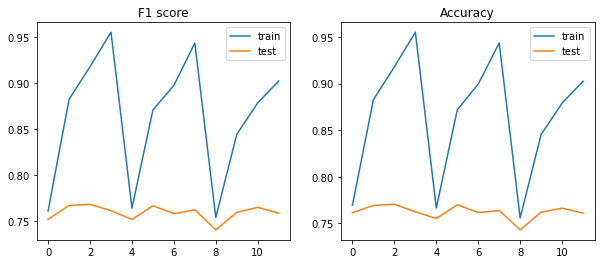

In [26]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('F1 score')
plt.plot(range(len(grid_cnn_results['params'])), grid_cnn_results['mean_train_f1_macro'], label='train')
plt.plot(range(len(grid_cnn_results['params'])), grid_cnn_results['mean_test_f1_macro'], label='test')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(range(len(grid_cnn_results['params'])), grid_cnn_results['mean_train_accuracy'], label='train')
plt.plot(range(len(grid_cnn_results['params'])), grid_cnn_results['mean_test_accuracy'], label='test')
plt.legend(loc='best')

### Čuvanje i evaluacija najboljeg modela

In [27]:
best_model = grid_cnn.best_estimator_

In [28]:
import joblib
joblib.dump(best_model, 'cnn.joblib')

['cnn.joblib']

In [29]:
y_pred = grid_cnn.predict(X_test)

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97       690
           2       0.63      0.79      0.70       690
           3       0.68      0.55      0.61       690
           4       0.83      0.78      0.80       690
           5       0.76      0.77      0.77       690

    accuracy                           0.77      3450
   macro avg       0.78      0.77      0.77      3450
weighted avg       0.78      0.77      0.77      3450



In [31]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[665  19   5   1   0]
 [  5 544 112   4  25]
 [  7 264 381  11  27]
 [  2   8  24 536 120]
 [  0  26  40  90 534]]


In [32]:
print('Accuracy na testnom skupu je ', metrics.classification_report(y_test, y_pred, output_dict=True)['accuracy'])

Accuracy na testnom skupu je  0.7710144927536232


In [33]:
print('F1 score na testnom skupu je ', metrics.classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score'])

F1 score na testnom skupu je  0.7702937899345141


(5.5, -0.5)

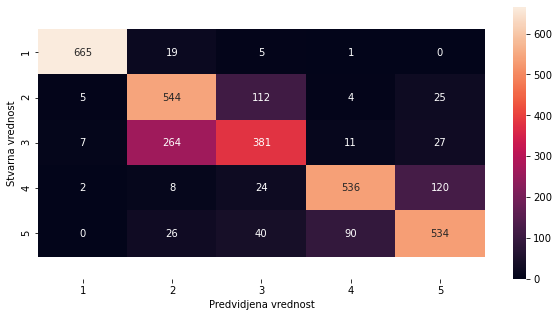

In [35]:
import seaborn
df_cm = pd.DataFrame(cm, index = classes, columns=classes)
plt.figure(figsize = (10, 5))
ax = seaborn.heatmap(df_cm, annot=True, fmt="d")
ax.set_ylabel('Stvarna vrednost')
ax.set_xlabel('Predvidjena vrednost')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)